In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors

In [6]:
df = pd.read_csv('corrected_dogs_dataset.csv')
df

,name,breed,rare_gen,price,age,life_expectancy,description_length,description,region,date,image_url
0,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/43/...
1,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/33/...
2,Самый Красивый мальчик Рокки ищет,Лабрадор ретривер,False,15000,0.4,12,189,"2.5 месяца... Добрый,игривый очень ласковый.. ...",Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/17/...
3,Щенки Чихуахуа,Чихуахуа,True,12000,0.5,15,250,Чихуахуа щенки короткошерстные и длинношерстны...,Москва,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/73/...
4,Такса жесткошерстная - щенки питомника,Такса (Дексхунд),False,60000,0.5,15,260,Племенной питомник РКФ &quotИз Ново-Переделкин...,Москва,20.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/4e/...
...,...,...,...,...,...,...,...,...,...,...,...
1155,Мальчики шоколадные мраморные,Йоркшир терьер,False,20000,0.5,15,77,Мальчик шокомерле от красивой пары. Активный н...,Санкт-Петербург,13.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/c7/...
1156,Щенки вельш корги кардиган,Вельш корги кардиган (корги кардиган),True,50000,0.5,12,263,Стандартные щенки вельш корги кардиган от чемп...,Санкт-Петербург,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/6e/...
1157,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/e9/...
1158,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/13/...


In [7]:
df.head()

,name,breed,rare_gen,price,age,life_expectancy,description_length,description,region,date,image_url
0,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/43/...
1,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/33/...
2,Самый Красивый мальчик Рокки ищет,Лабрадор ретривер,False,15000,0.4,12,189,"2.5 месяца... Добрый,игривый очень ласковый.. ...",Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/17/...
3,Щенки Чихуахуа,Чихуахуа,True,12000,0.5,15,250,Чихуахуа щенки короткошерстные и длинношерстны...,Москва,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/73/...
4,Такса жесткошерстная - щенки питомника,Такса (Дексхунд),False,60000,0.5,15,260,Племенной питомник РКФ &quotИз Ново-Переделкин...,Москва,20.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/4e/...


In [8]:
df.value_counts('name')
# много значений с пустым именем (HfjNUlYZ)

name
HfjNUlYZ                                   88
Щенки лабрадора                            11
Щенки Сиба Ину                              9
Йоркширский терьер                          9
Кавалер Кинг Чарльз Спаниель                8
                                           ..
Резервирование щенков словацкого чувача     1
Родезийский риджбек девочка. Стандарт.      1
Родезийский риджбек мальчик                 1
Ротвейлеры                                  1
щенок шиба сиба-ину                         1
Name: count, Length: 765, dtype: int64

In [9]:
df = df[df['name'] != 'HfjNUlYZ']
df.value_counts('name')

name
Щенки лабрадора                            11
Щенки Сиба Ину                              9
Йоркширский терьер                          9
Французский бульдог                         8
Кавалер Кинг Чарльз Спаниель                8
                                           ..
Резервирование щенков словацкого чувача     1
Родезийский риджбек девочка. Стандарт.      1
Родезийский риджбек мальчик                 1
Ротвейлеры                                  1
щенок шиба сиба-ину                         1
Name: count, Length: 764, dtype: int64

In [10]:
df.to_csv('dogs_dataset.csv', index=False)

In [11]:
df

,name,breed,rare_gen,price,age,life_expectancy,description_length,description,region,date,image_url
0,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/43/...
1,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/33/...
2,Самый Красивый мальчик Рокки ищет,Лабрадор ретривер,False,15000,0.4,12,189,"2.5 месяца... Добрый,игривый очень ласковый.. ...",Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/17/...
3,Щенки Чихуахуа,Чихуахуа,True,12000,0.5,15,250,Чихуахуа щенки короткошерстные и длинношерстны...,Москва,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/73/...
4,Такса жесткошерстная - щенки питомника,Такса (Дексхунд),False,60000,0.5,15,260,Племенной питомник РКФ &quotИз Ново-Переделкин...,Москва,20.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/4e/...
...,...,...,...,...,...,...,...,...,...,...,...
1155,Мальчики шоколадные мраморные,Йоркшир терьер,False,20000,0.5,15,77,Мальчик шокомерле от красивой пары. Активный н...,Санкт-Петербург,13.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/c7/...
1156,Щенки вельш корги кардиган,Вельш корги кардиган (корги кардиган),True,50000,0.5,12,263,Стандартные щенки вельш корги кардиган от чемп...,Санкт-Петербург,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/6e/...
1157,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/e9/...
1158,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/13/...


In [12]:
df[~df['name'].str.contains(r'[а-яА-Я]', regex=True)].value_counts('name')

name
1           1
1'&quot     1
@@UkcHY     1
BVpsK3AS    1
Robawx      1
Robdzr      1
Robfvm      1
Robgdo      1
Robgtz      1
Robkra      1
Robltb      1
Roboad      1
Name: count, dtype: int64

In [13]:
df = df[df['name'].str.contains(r'[а-яА-Я]', regex=True)]
df

,name,breed,rare_gen,price,age,life_expectancy,description_length,description,region,date,image_url
0,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/43/...
1,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/33/...
2,Самый Красивый мальчик Рокки ищет,Лабрадор ретривер,False,15000,0.4,12,189,"2.5 месяца... Добрый,игривый очень ласковый.. ...",Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/17/...
3,Щенки Чихуахуа,Чихуахуа,True,12000,0.5,15,250,Чихуахуа щенки короткошерстные и длинношерстны...,Москва,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/73/...
4,Такса жесткошерстная - щенки питомника,Такса (Дексхунд),False,60000,0.5,15,260,Племенной питомник РКФ &quotИз Ново-Переделкин...,Москва,20.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/4e/...
...,...,...,...,...,...,...,...,...,...,...,...
1155,Мальчики шоколадные мраморные,Йоркшир терьер,False,20000,0.5,15,77,Мальчик шокомерле от красивой пары. Активный н...,Санкт-Петербург,13.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/c7/...
1156,Щенки вельш корги кардиган,Вельш корги кардиган (корги кардиган),True,50000,0.5,12,263,Стандартные щенки вельш корги кардиган от чемп...,Санкт-Петербург,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/6e/...
1157,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/e9/...
1158,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/13/...


In [14]:
df.value_counts('name')
# некорректные данные исключены из датасета

name
Щенки лабрадора                           11
Йоркширский терьер                         9
Щенки Сиба Ину                             9
Французский бульдог                        8
Кавалер Кинг Чарльз Спаниель               8
                                          ..
Русская салонная собака                    1
Русский охотничий спаниель                 1
Русский охотничий спаниэль                 1
Русский той - отечественная жемчужина!     1
щенок шиба сиба-ину                        1
Name: count, Length: 752, dtype: int64

In [15]:
df.to_csv('dogs_dataset.csv', index=False)

In [16]:
df.isnull().sum()

name                  0
breed                 0
rare_gen              0
price                 0
age                   0
life_expectancy       0
description_length    0
description           0
region                0
date                  0
image_url             0
dtype: int64

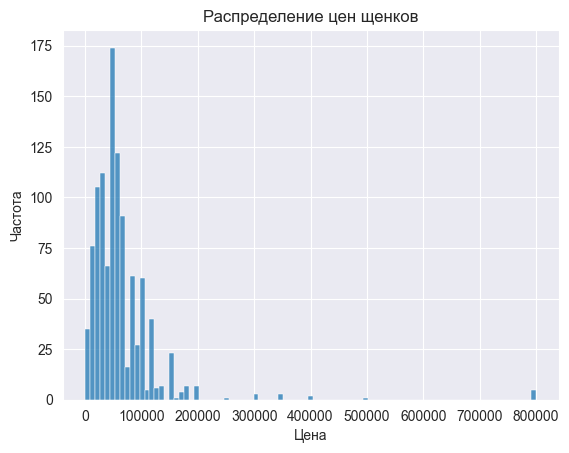

In [17]:
sns.histplot(df['price'], kde=False)
plt.title('Распределение цен щенков')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

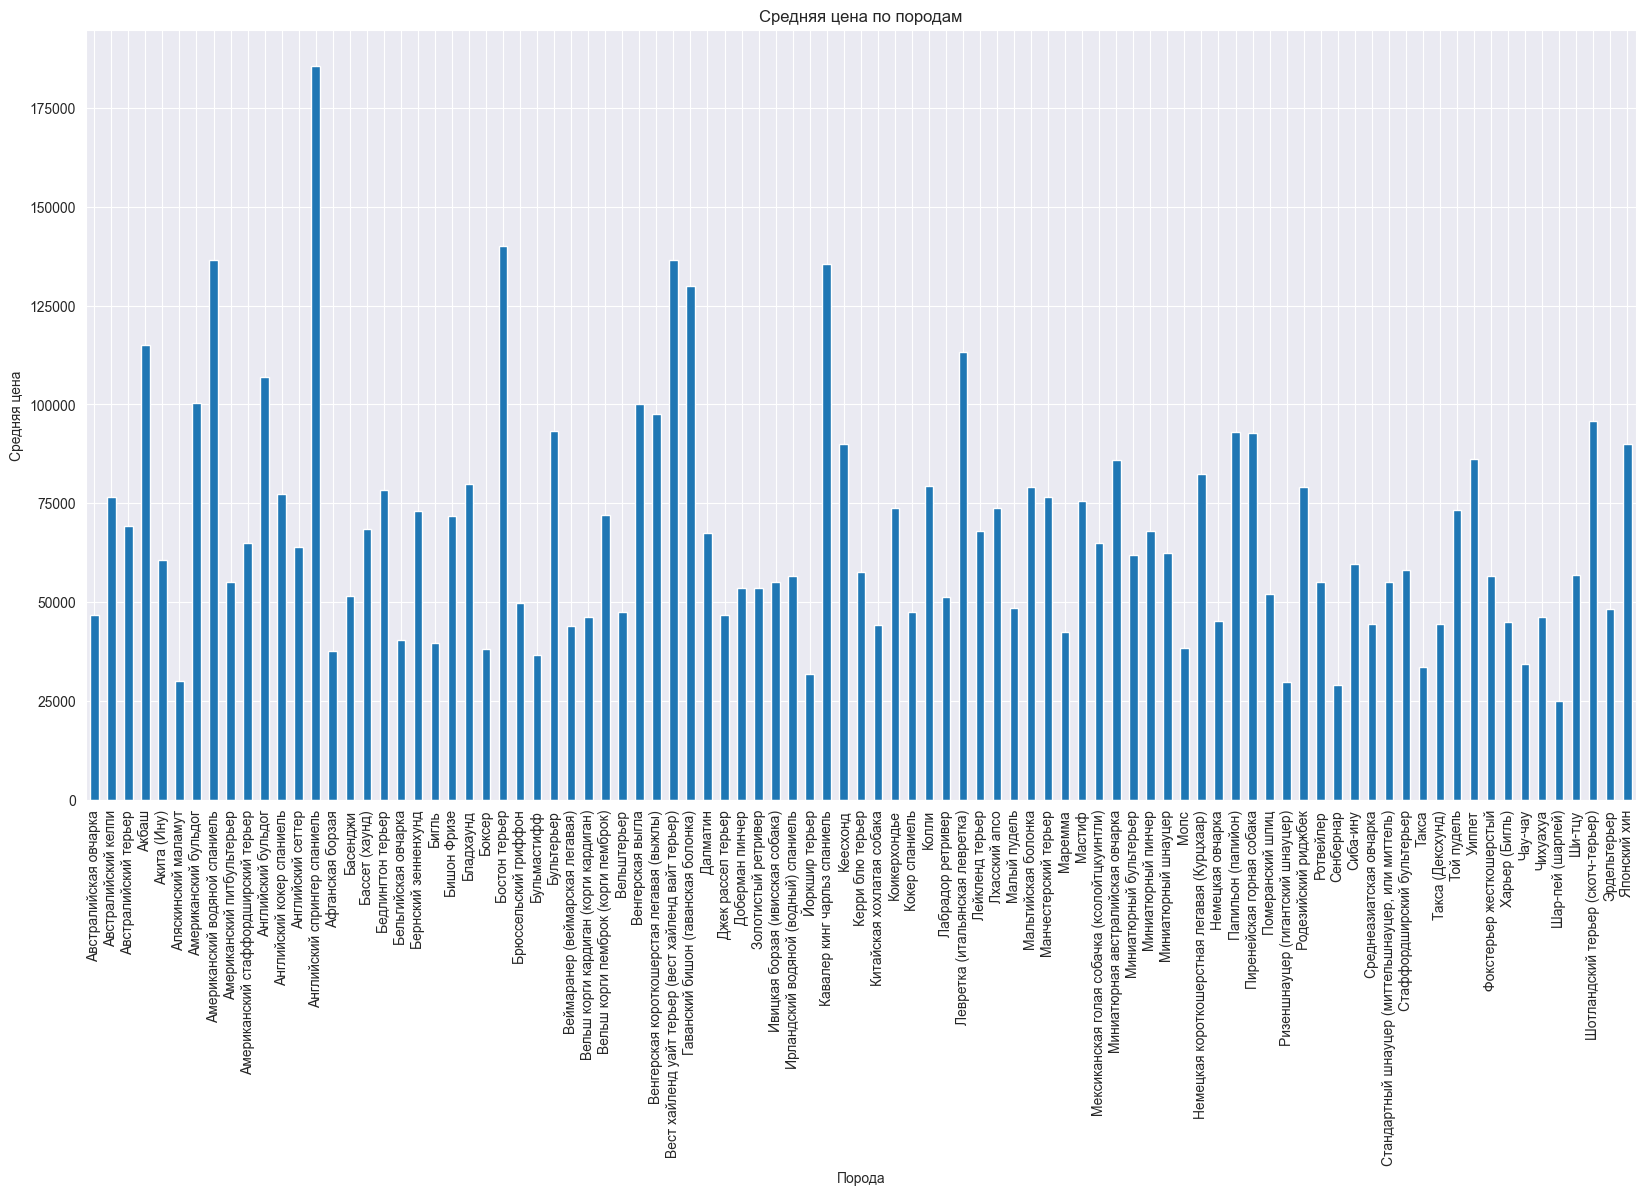

In [18]:
plt.figure(figsize=(20, 10))
breed_price = df.groupby('breed')['price'].mean()
breed_price.plot(kind='bar')
plt.title('Средняя цена по породам')
plt.xlabel('Порода')
plt.ylabel('Средняя цена')
plt.xticks(rotation=90)
plt.show()

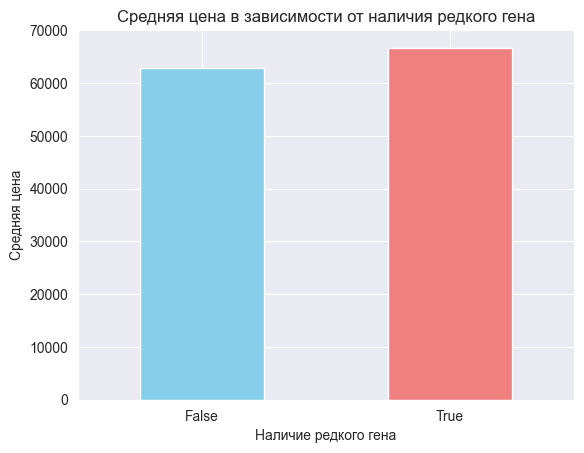

In [19]:
rare_gen_price = df.groupby('rare_gen')['price'].mean()
rare_gen_price.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Средняя цена в зависимости от наличия редкого гена')
plt.xlabel('Наличие редкого гена')
plt.ylabel('Средняя цена')
plt.xticks(rotation=0)
plt.show()

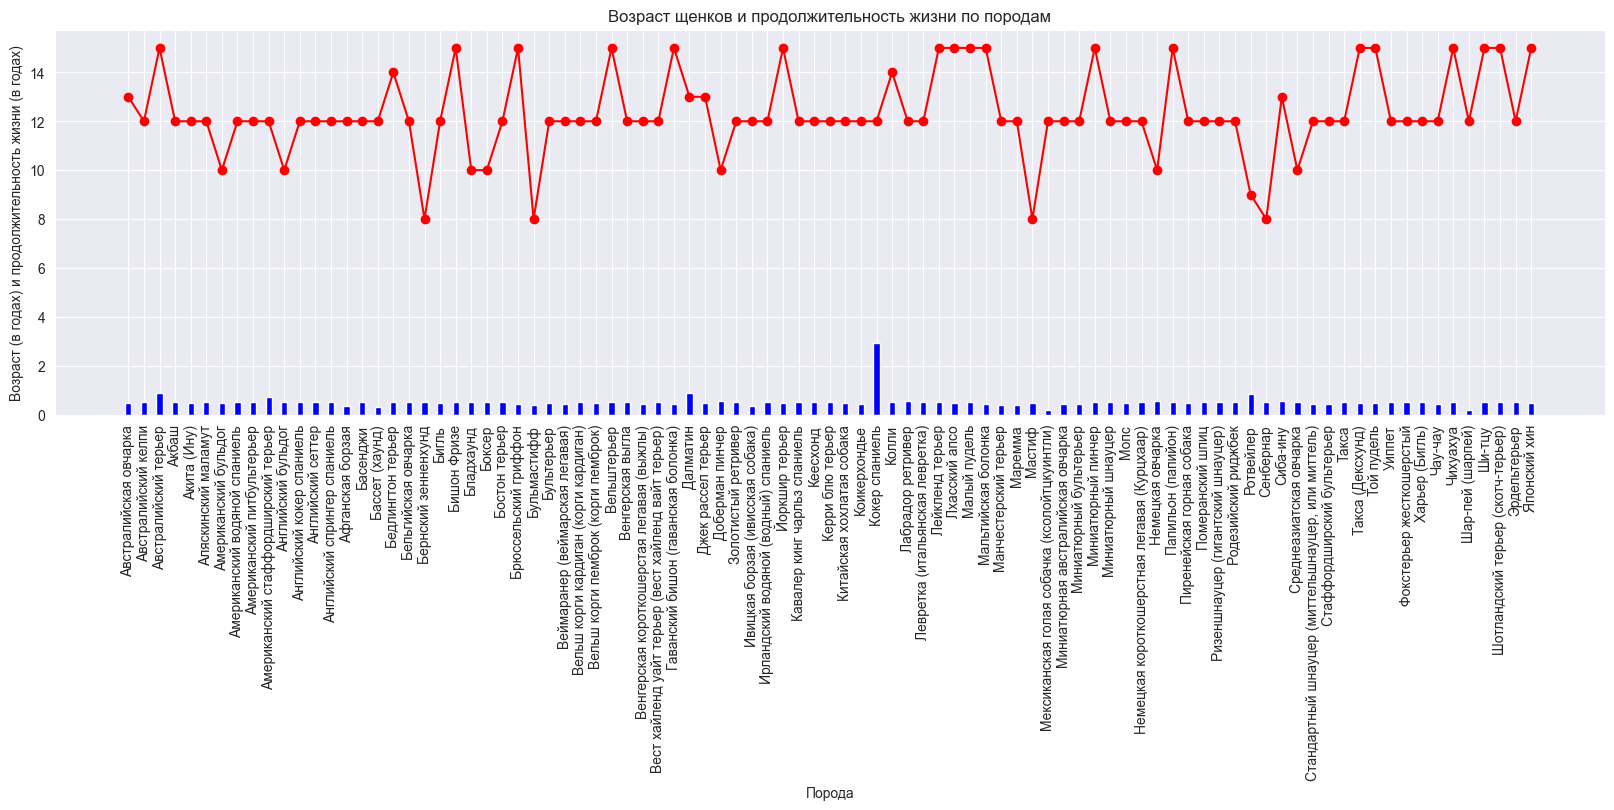

In [20]:
breed_age_life = df.groupby('breed').agg({'age': 'mean', 'life_expectancy': 'mean'}).reset_index()
plt.figure(figsize=(20, 5))
plt.bar(breed_age_life['breed'], breed_age_life['age'], width=0.4, label='Средний возраст', color='b', align='center')
plt.plot(breed_age_life['breed'], breed_age_life['life_expectancy'], label='Продолжительность жизни', color='r', marker='o')
plt.title('Возраст щенков и продолжительность жизни по породам')
plt.xlabel('Порода')
plt.ylabel('Возраст (в годах) и продолжительность жизни (в годах)')
plt.xticks(rotation=90)
plt.show()

In [21]:
df_test = df.copy()
le = LabelEncoder()

In [22]:
df_test = df_test.drop(columns = ['image_url', 'description'])

In [23]:
df_test

,name,breed,rare_gen,price,age,life_expectancy,description_length,region,date
0,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,Санкт-Петербург,25.11.2024
1,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,Санкт-Петербург,25.11.2024
2,Самый Красивый мальчик Рокки ищет,Лабрадор ретривер,False,15000,0.4,12,189,Санкт-Петербург,25.11.2024
3,Щенки Чихуахуа,Чихуахуа,True,12000,0.5,15,250,Москва,25.11.2024
4,Такса жесткошерстная - щенки питомника,Такса (Дексхунд),False,60000,0.5,15,260,Москва,20.11.2024
...,...,...,...,...,...,...,...,...,...
1155,Мальчики шоколадные мраморные,Йоркшир терьер,False,20000,0.5,15,77,Санкт-Петербург,13.06.2022
1156,Щенки вельш корги кардиган,Вельш корги кардиган (корги кардиган),True,50000,0.5,12,263,Санкт-Петербург,12.06.2022
1157,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Москва,12.06.2022
1158,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Москва,12.06.2022


In [24]:
df_test['name'] = le.fit_transform(df_test['name'])
df_test['breed'] = le.fit_transform(df_test['breed'])
df_test['rare_gen'] = le.fit_transform(df_test['rare_gen'])
df_test['age'] = le.fit_transform(df_test['age'])
df_test['region'] = le.fit_transform(df_test['region'])
df_test['date'] = le.fit_transform(df_test['date'])

In [25]:
df_test

,name,breed,rare_gen,price,age,life_expectancy,description_length,region,date
0,500,33,0,75000,3,12,6,25,427
1,500,33,0,75000,3,12,6,25,427
2,295,50,0,15000,2,12,189,25,427
3,468,85,1,12000,3,15,250,13,427
4,320,79,0,60000,3,15,260,13,343
...,...,...,...,...,...,...,...,...,...
1155,143,42,0,20000,3,15,77,25,217
1156,495,29,1,50000,3,12,263,25,194
1157,492,28,0,60000,3,12,252,13,194
1158,492,28,0,60000,3,12,252,13,194


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 0 to 1159
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   name                1060 non-null   int64
 1   breed               1060 non-null   int64
 2   rare_gen            1060 non-null   int64
 3   price               1060 non-null   int64
 4   age                 1060 non-null   int64
 5   life_expectancy     1060 non-null   int64
 6   description_length  1060 non-null   int64
 7   region              1060 non-null   int64
 8   date                1060 non-null   int64
dtypes: int64(9)
memory usage: 82.8 KB


In [27]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_test)
# нормализация данных

In [28]:
df_normalized

array([[ 0.59496155, -0.6293129 , -0.62098383, ..., -2.64010383,
         1.36451172,  1.14530937],
       [ 0.59496155, -0.6293129 , -0.62098383, ..., -2.64010383,
         1.36451172,  1.14530937],
       [-0.36669528,  0.04218275, -0.62098383, ..., -0.23750976,
         1.36451172,  1.14530937],
       ...,
       [ 0.55743348, -0.82681162, -0.62098383, ...,  0.58961279,
        -0.45980918, -0.41095687],
       [ 0.55743348, -0.82681162, -0.62098383, ...,  0.58961279,
        -0.45980918, -0.41095687],
       [ 0.83420301, -1.6168065 , -0.62098383, ..., -0.53947514,
         1.36451172, -0.41095687]])

In [34]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_normalized)
df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne

,TSNE1,TSNE2
0,-3.136658,-5.079438
1,-3.136649,-5.079688
2,-9.514320,-1.101855
3,5.258285,42.678131
4,22.420004,-11.930474
...,...,...
1055,2.400331,-2.047908
1056,14.530977,43.885979
1057,-12.178322,-23.888832
1058,-12.175013,-23.896921


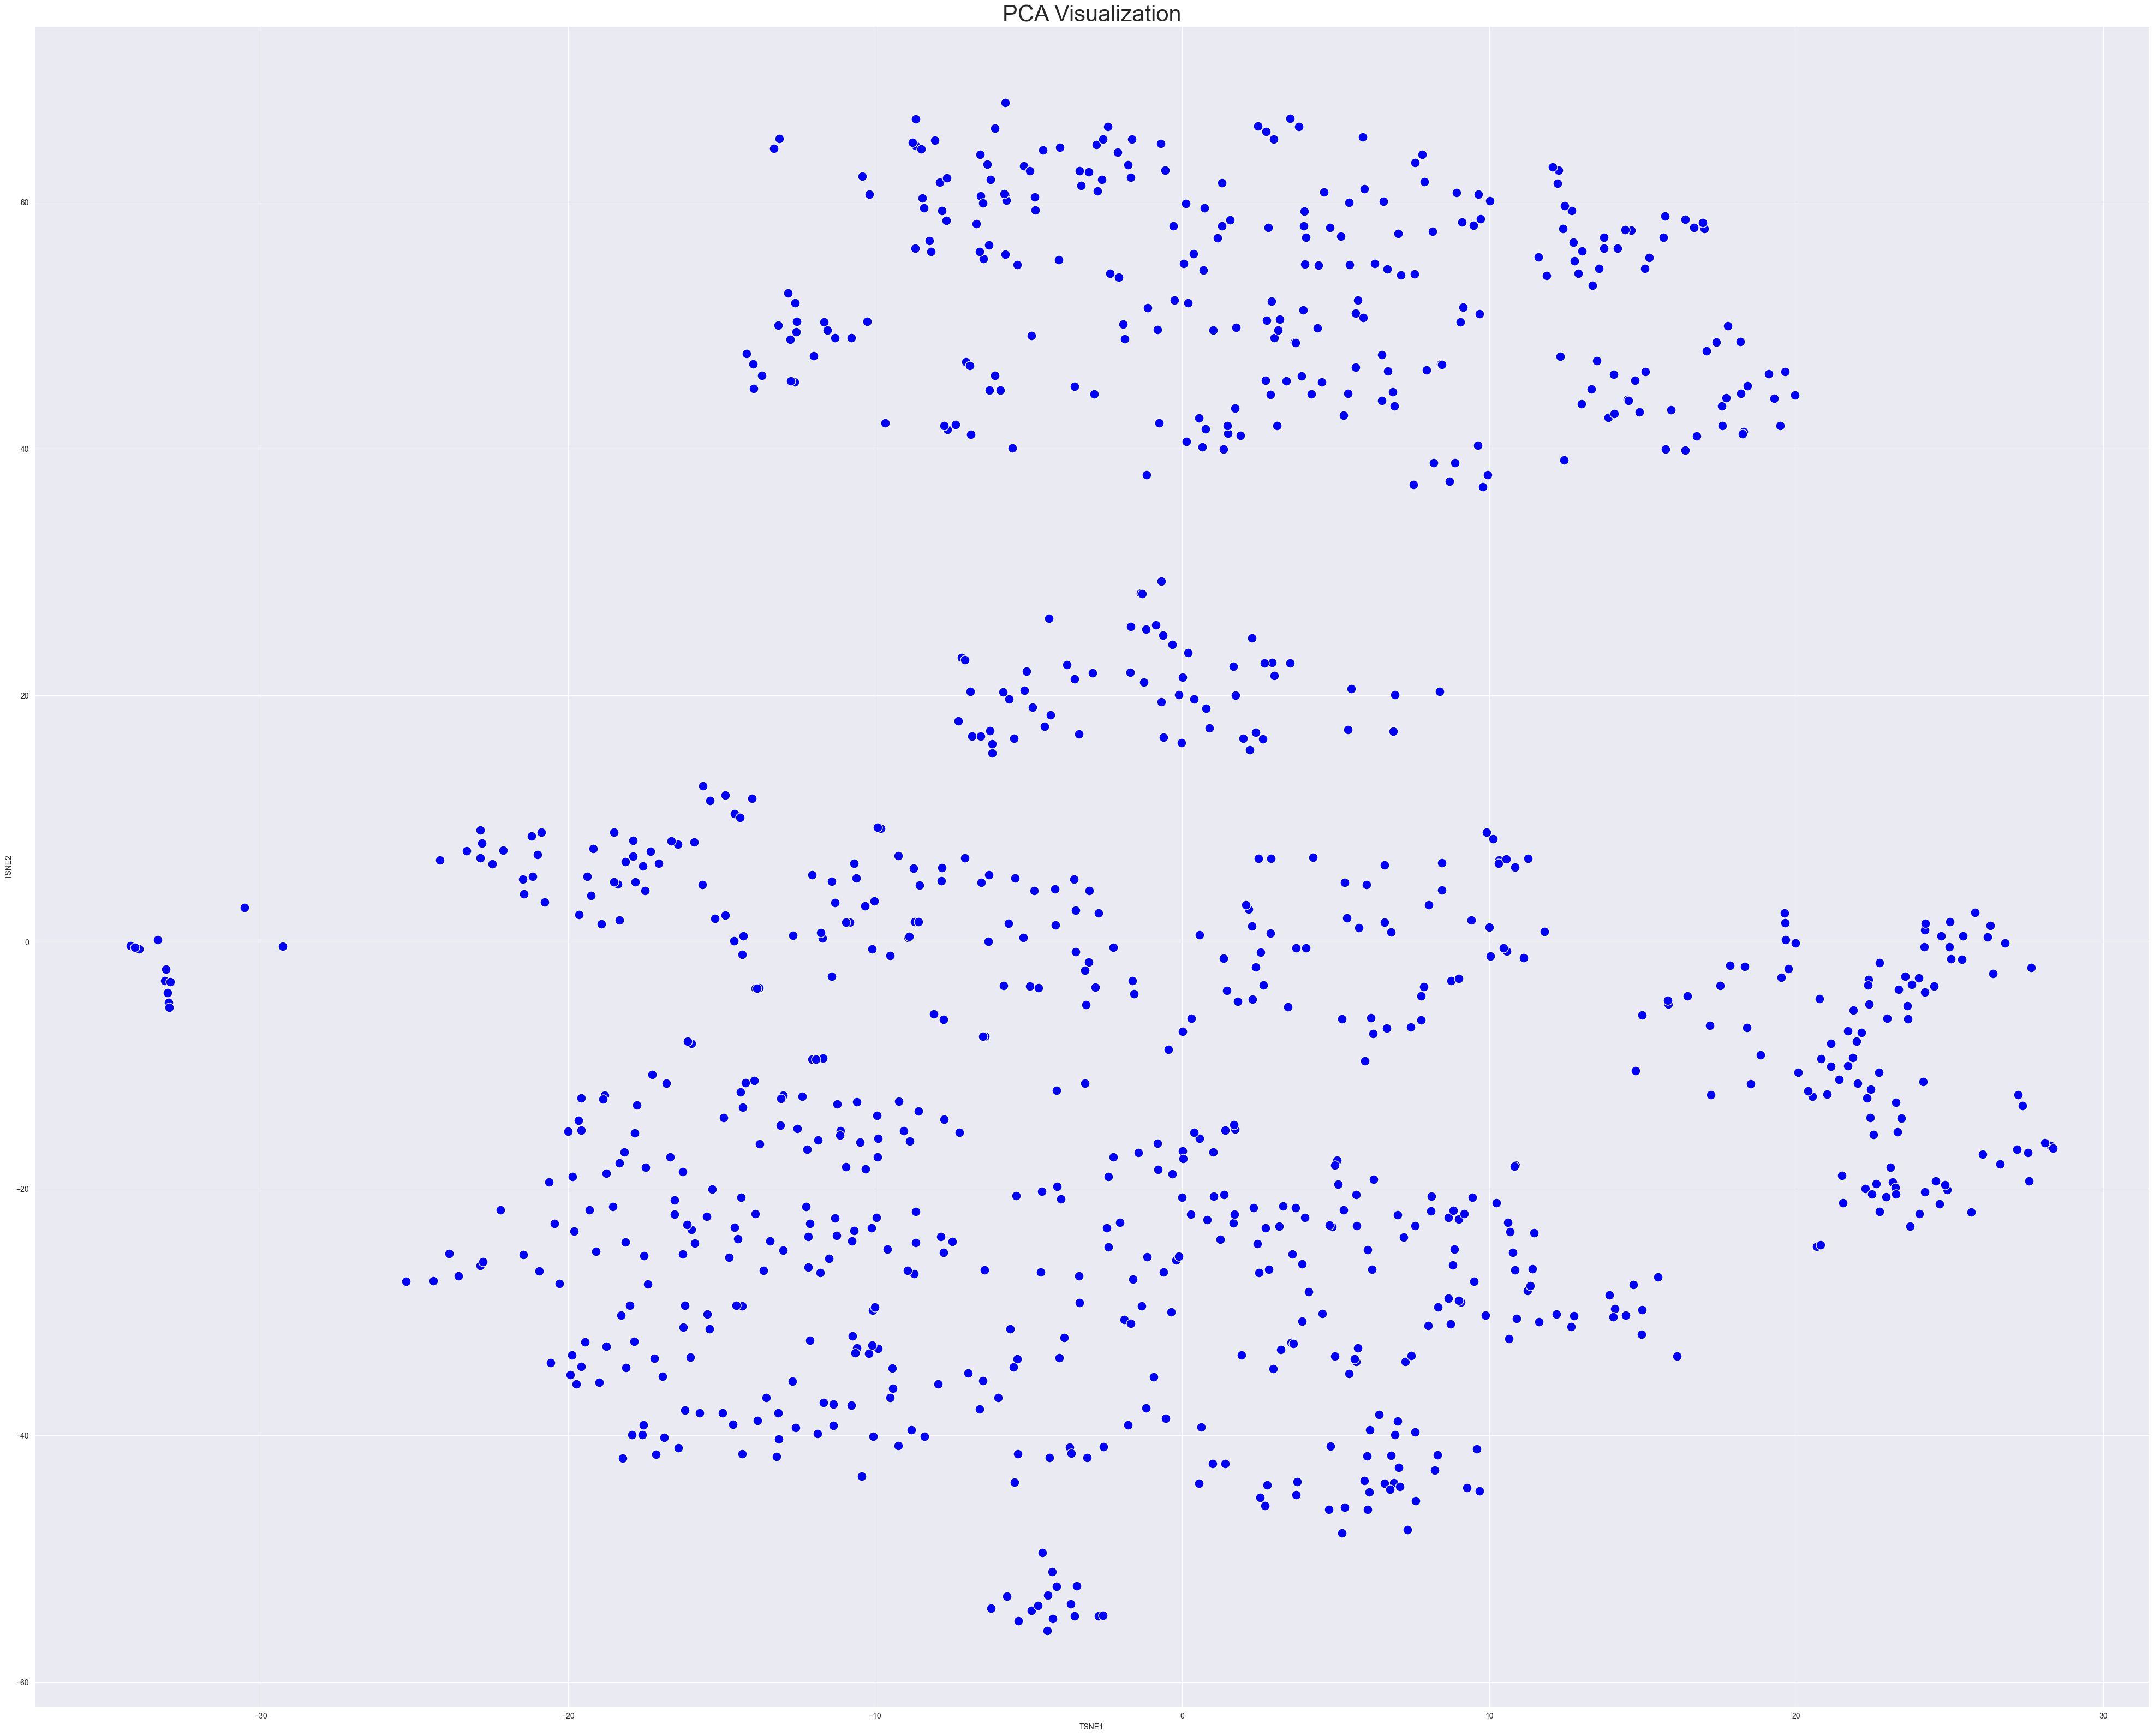

In [35]:
plt.figure(figsize=(50, 40))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_tsne, s=150, color='blue')
plt.title('PCA Visualization').set_fontsize(30)
plt.grid(True)
plt.show()

In [36]:
threshold = 0
df_tsne['baseline_cluster'] = df_tsne['TSNE1'].apply(lambda x: 0 if x > threshold else 1)
df_tsne['baseline_cluster'].value_counts()
# baseline решение

baseline_cluster
1    542
0    518
Name: count, dtype: int64

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_normalized)
df['dbscan_cluster'] = clusters

score = silhouette_score(df_normalized, clusters)
print(f'Результат: {score}')

Результат: -0.27500275743009467


/var/folders/t5/pwn__ldx45s30tgp8m7_2x680000gn/T/ipykernel_7119/3077316542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dbscan_cluster'] = clusters


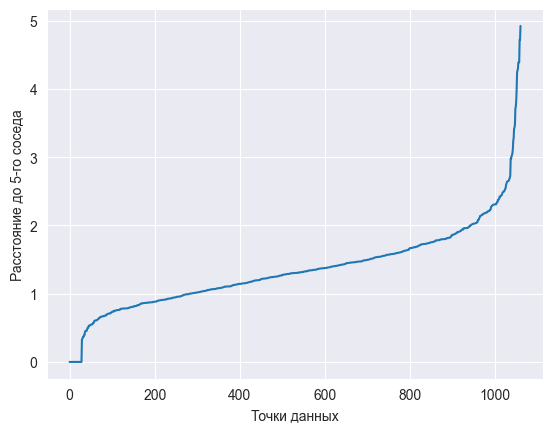

In [162]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_normalized)
distances, indices = neighbors_fit.kneighbors(df_normalized)

distances = np.sort(distances[:, -1], axis=0)

plt.plot(distances)
plt.ylabel('Расстояние до 5-го соседа')
plt.xlabel('Точки данных')
plt.show()

In [160]:
param_grid = {
    'eps': np.linspace(0.5, 2.23137, 20), # подбирал исходя из графика
    'min_samples': range(3, 10)
}

best_score = -1
best_params = {}

silhouette_scores = []
eps_values = []
min_samples_values = []

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    clusters = dbscan.fit_predict(df_normalized)
    if len(set(clusters)) > 1 and -1 in set(clusters):  
        score = silhouette_score(df_normalized, clusters)
        silhouette_scores.append(score)
        eps_values.append(params['eps'])
        min_samples_values.append(params['min_samples'])
        if score > best_score:
            best_score = score
            best_params = params

print(f'Лучшие гиперпараметры: {best_params}')
print(f'Лучший результат силуэтного коэффициента: {best_score}')

Лучшие гиперпараметры: {'eps': np.float64(2.23137), 'min_samples': 5}
Лучший результат силуэтного коэффициента: 0.14501858104938492


In [163]:
for eps, min_samples in zip(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_normalized)
    score = silhouette_score(df_normalized, clusters)
    print(f"eps = {eps}, min_samples = {min_samples}, Silhouette score = {score}")

eps = 0.5, min_samples = 3, Silhouette score = -0.3093754474265659
eps = 0.5, min_samples = 4, Silhouette score = -0.3225903931949736
eps = 0.5, min_samples = 5, Silhouette score = -0.27500275743009467
eps = 0.5, min_samples = 6, Silhouette score = -0.16214400590644348
eps = 0.5, min_samples = 7, Silhouette score = -0.09689622164666255
eps = 0.5911247368421053, min_samples = 3, Silhouette score = -0.27186603873780163
eps = 0.5911247368421053, min_samples = 4, Silhouette score = -0.31961683990625567
eps = 0.5911247368421053, min_samples = 5, Silhouette score = -0.29892057676202805
eps = 0.5911247368421053, min_samples = 6, Silhouette score = -0.2423319197210025
eps = 0.5911247368421053, min_samples = 7, Silhouette score = -0.095545470914639
eps = 0.5911247368421053, min_samples = 8, Silhouette score = 0.08221724607522754
eps = 0.5911247368421053, min_samples = 9, Silhouette score = 0.08221724607522754
eps = 0.6822494736842105, min_samples = 3, Silhouette score = -0.22040407499711653
eps

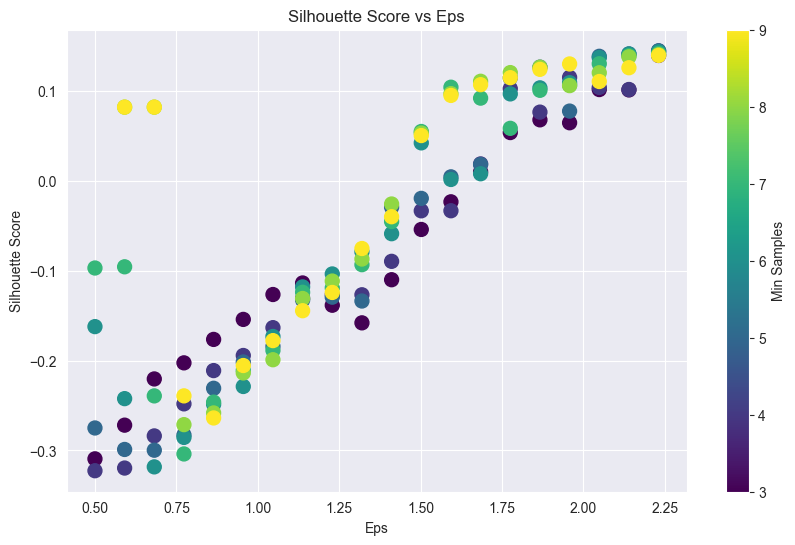

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(eps_values, silhouette_scores, c=min_samples_values, cmap='viridis', s=100)
plt.colorbar(label='Min Samples')
plt.title('Silhouette Score vs Eps')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
# график зависимости качества модели от гиперпараметров

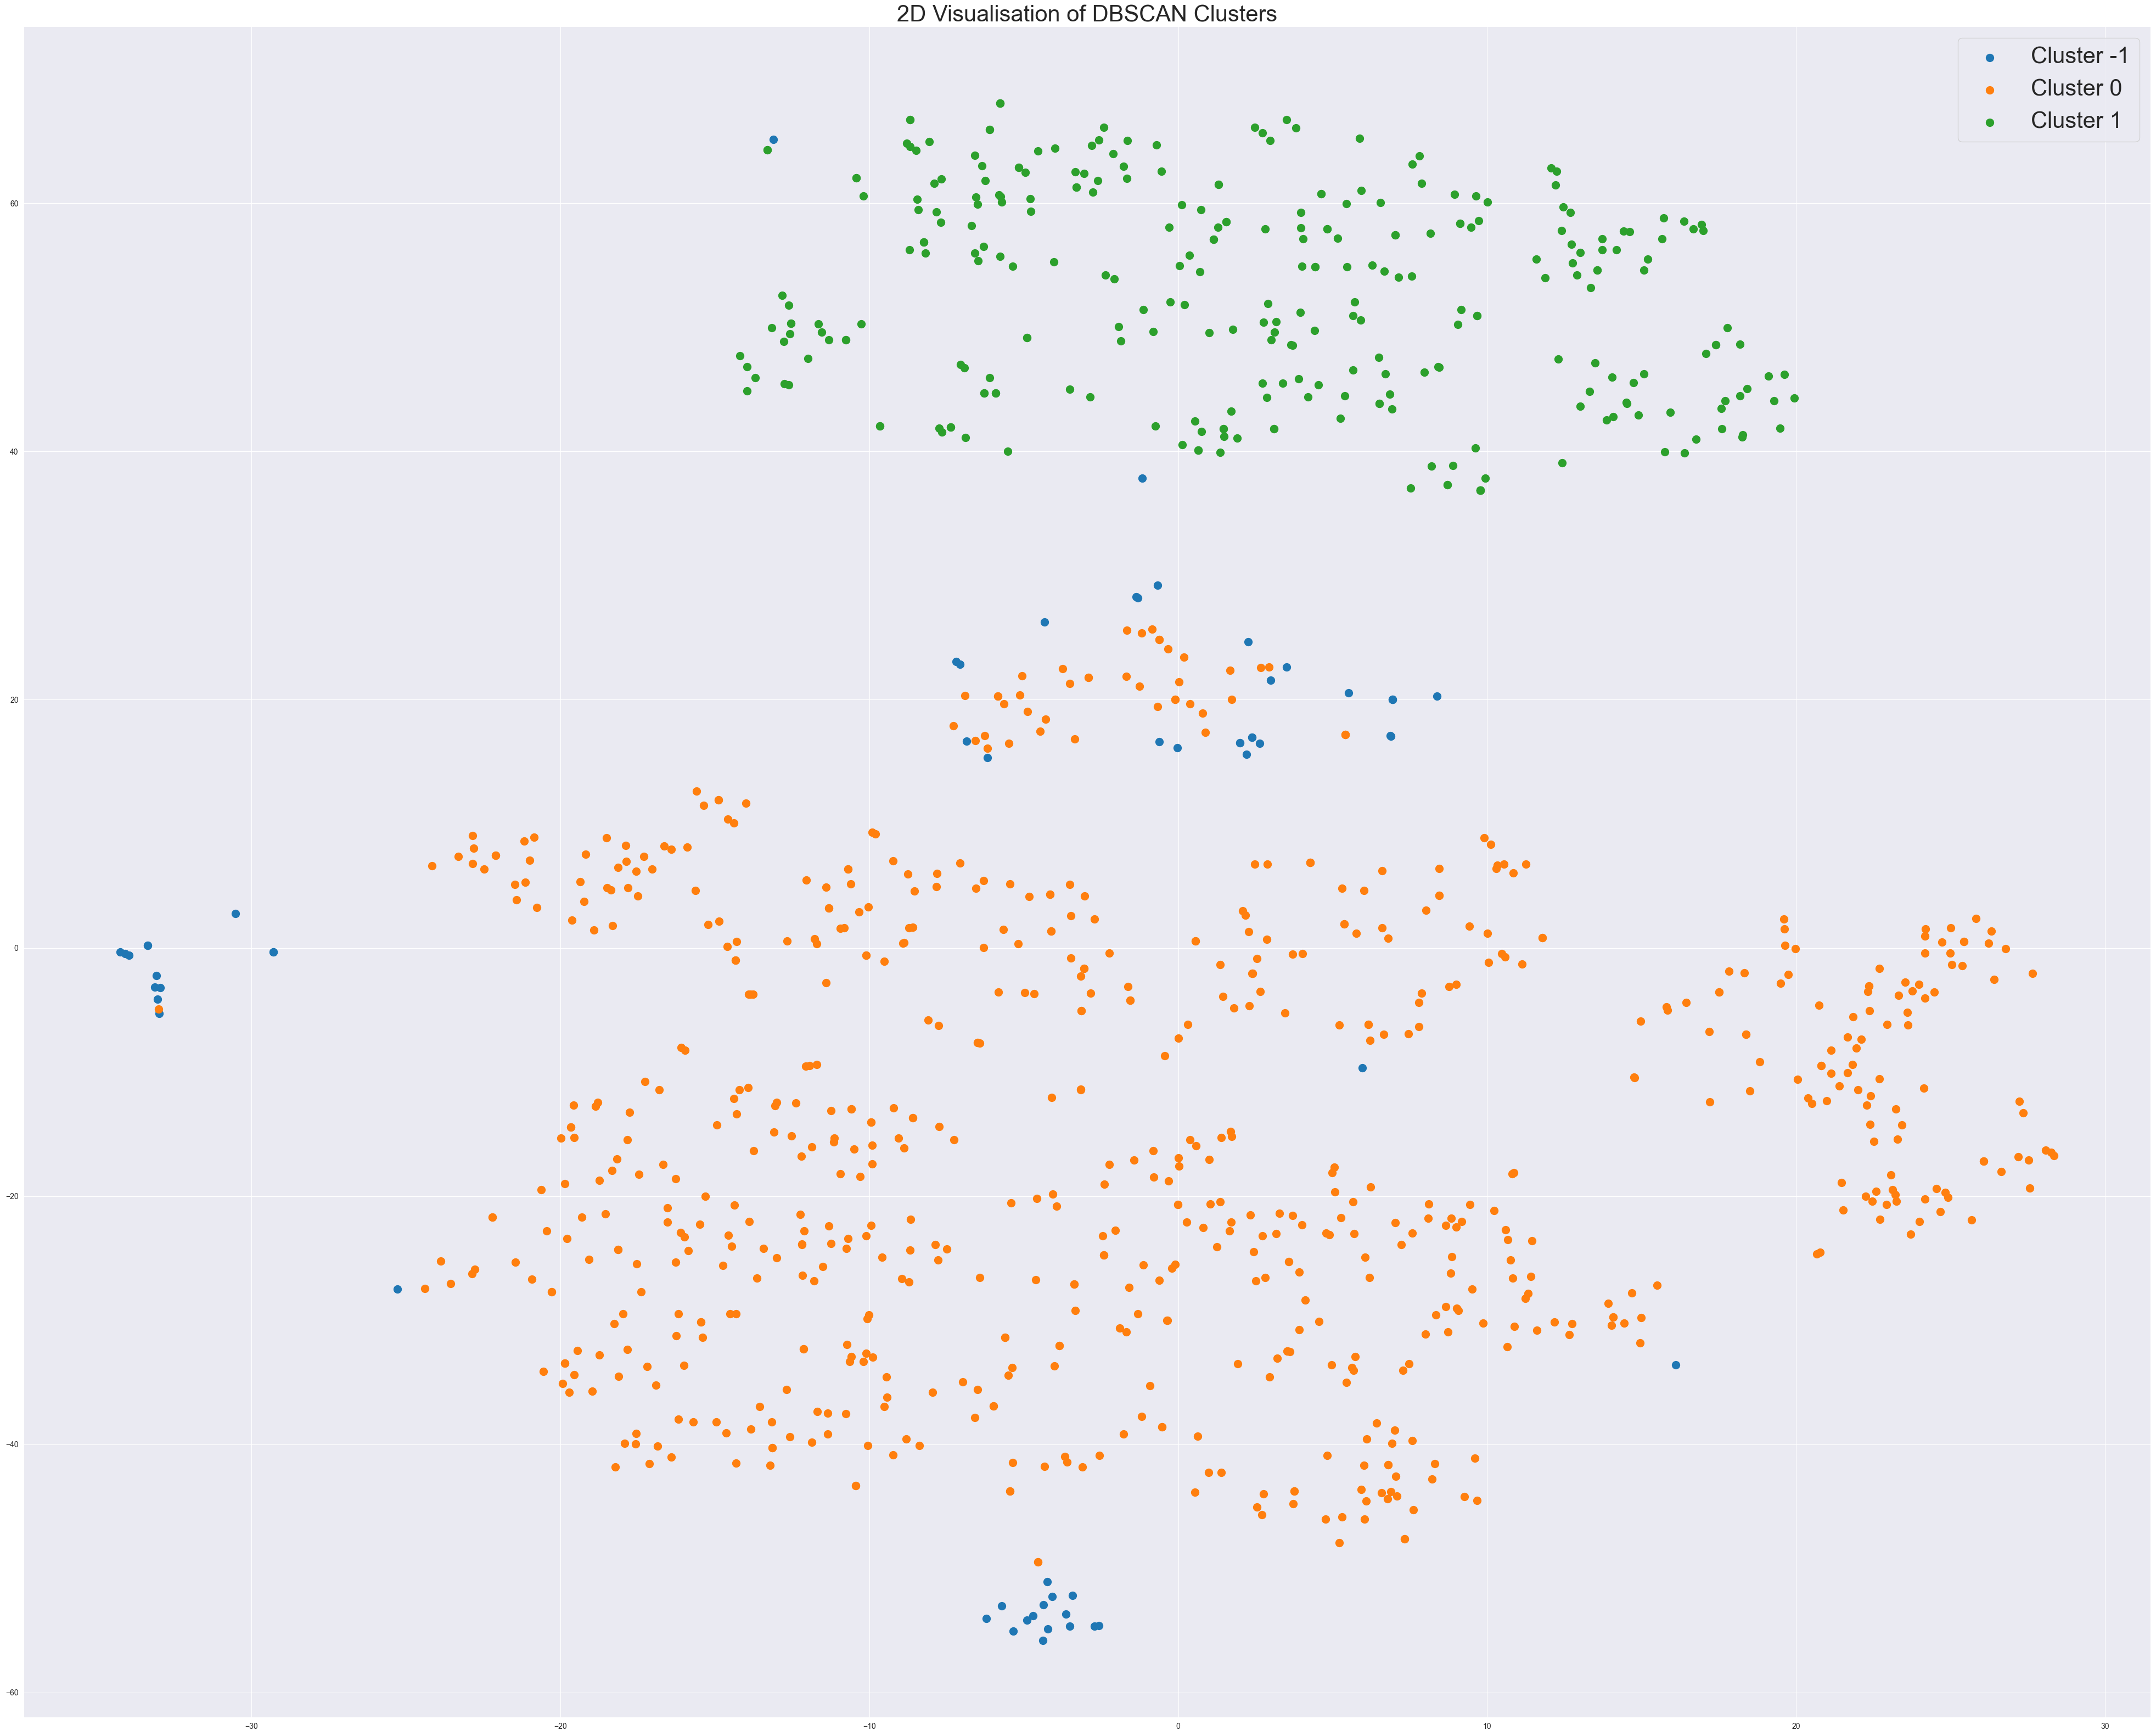

In [165]:
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])

tsne = TSNE(n_components=2)
principal_components = tsne.fit_transform(df_normalized)

tsne_df = pd.DataFrame(data=principal_components, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters

plt.figure(figsize=(50, 40))
for cluster in sorted(tsne_df['cluster'].unique()): 
    cluster_data = tsne_df[tsne_df['cluster'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}', s = 100)
    
plt.title('2D Visualisation of DBSCAN Clusters', fontsize = 30)
plt.legend(fontsize = 30)
plt.grid(True)
plt.show()

In [166]:
# моя реализация модели
class MyDBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.cluster_label = None
        
    def fit_predict(self, data):
        n_samples = data.shape[0]
        self.cluster_label = -np.ones(n_samples)
        cluster_count = 0
        dist_matrix = pairwise_distances(data)
        for i in range(n_samples):
            if self.cluster_label[i] != -1:
                continue
            neighbors = np.where(dist_matrix[i] <= self.eps)[0]
            if len(neighbors) < self.min_samples:
                continue
            self._assign_cluster(i, neighbors, dist_matrix, cluster_count)
            cluster_count += 1
        return self.cluster_label
    
    def _assign_cluster(self, point_idx, neighbors, dist_matrix, cluster_count):
        self.cluster_label[point_idx] = cluster_count
        queue = list(neighbors)
        while len(queue) > 0:
            current = queue.pop(0)
            if self.cluster_label[current] != -1:
                continue
            self.cluster_label[current] = cluster_count
            current_neighbors = np.where(dist_matrix[current] <= self.eps)[0]
            if len(current_neighbors) >= self.min_samples:
                queue.extend([n for n in current_neighbors if self.cluster_label[n] == -1])

In [167]:
param_grid = {
    'eps': np.linspace(0.5, 2.23137, 20),
    'min_samples': range(3, 10)
}

my_model_best_score = -1
my_model_best_params = {}

silhouette_scores = []
eps_values = []
min_samples_values = []

for params in ParameterGrid(param_grid):
    dbscan = MyDBSCAN(**params)
    clusters = dbscan.fit_predict(df_normalized)
    if len(set(clusters)) > 1 and -1 in set(clusters):  
        score = silhouette_score(df_normalized, clusters)
        silhouette_scores.append(score)
        eps_values.append(params['eps'])
        min_samples_values.append(params['min_samples'])
        if score > my_model_best_score:
            my_model_best_score = score
            my_model_best_params = params

print(f'Лучшие гиперпараметры моей модели: {my_model_best_score}')
print(f'Лучший результат силуэтного коэффициента моей модели: {my_model_best_params}')

Лучшие гиперпараметры моей модели: 0.14501858104938492
Лучший результат силуэтного коэффициента моей модели: {'eps': np.float64(2.23137), 'min_samples': 5}


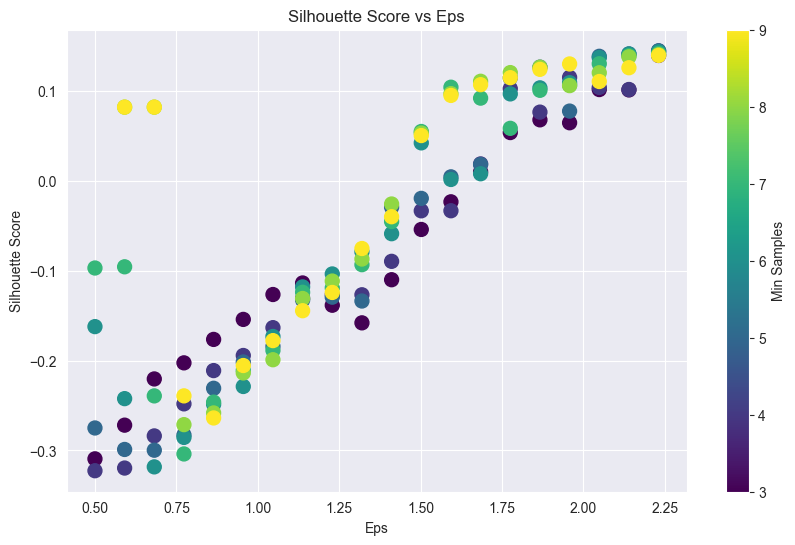

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(eps_values, silhouette_scores, c=min_samples_values, cmap='viridis', s=100)
plt.colorbar(label='Min Samples')
plt.title('Silhouette Score vs Eps')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
# график зависимости качества модели от гиперпараметров

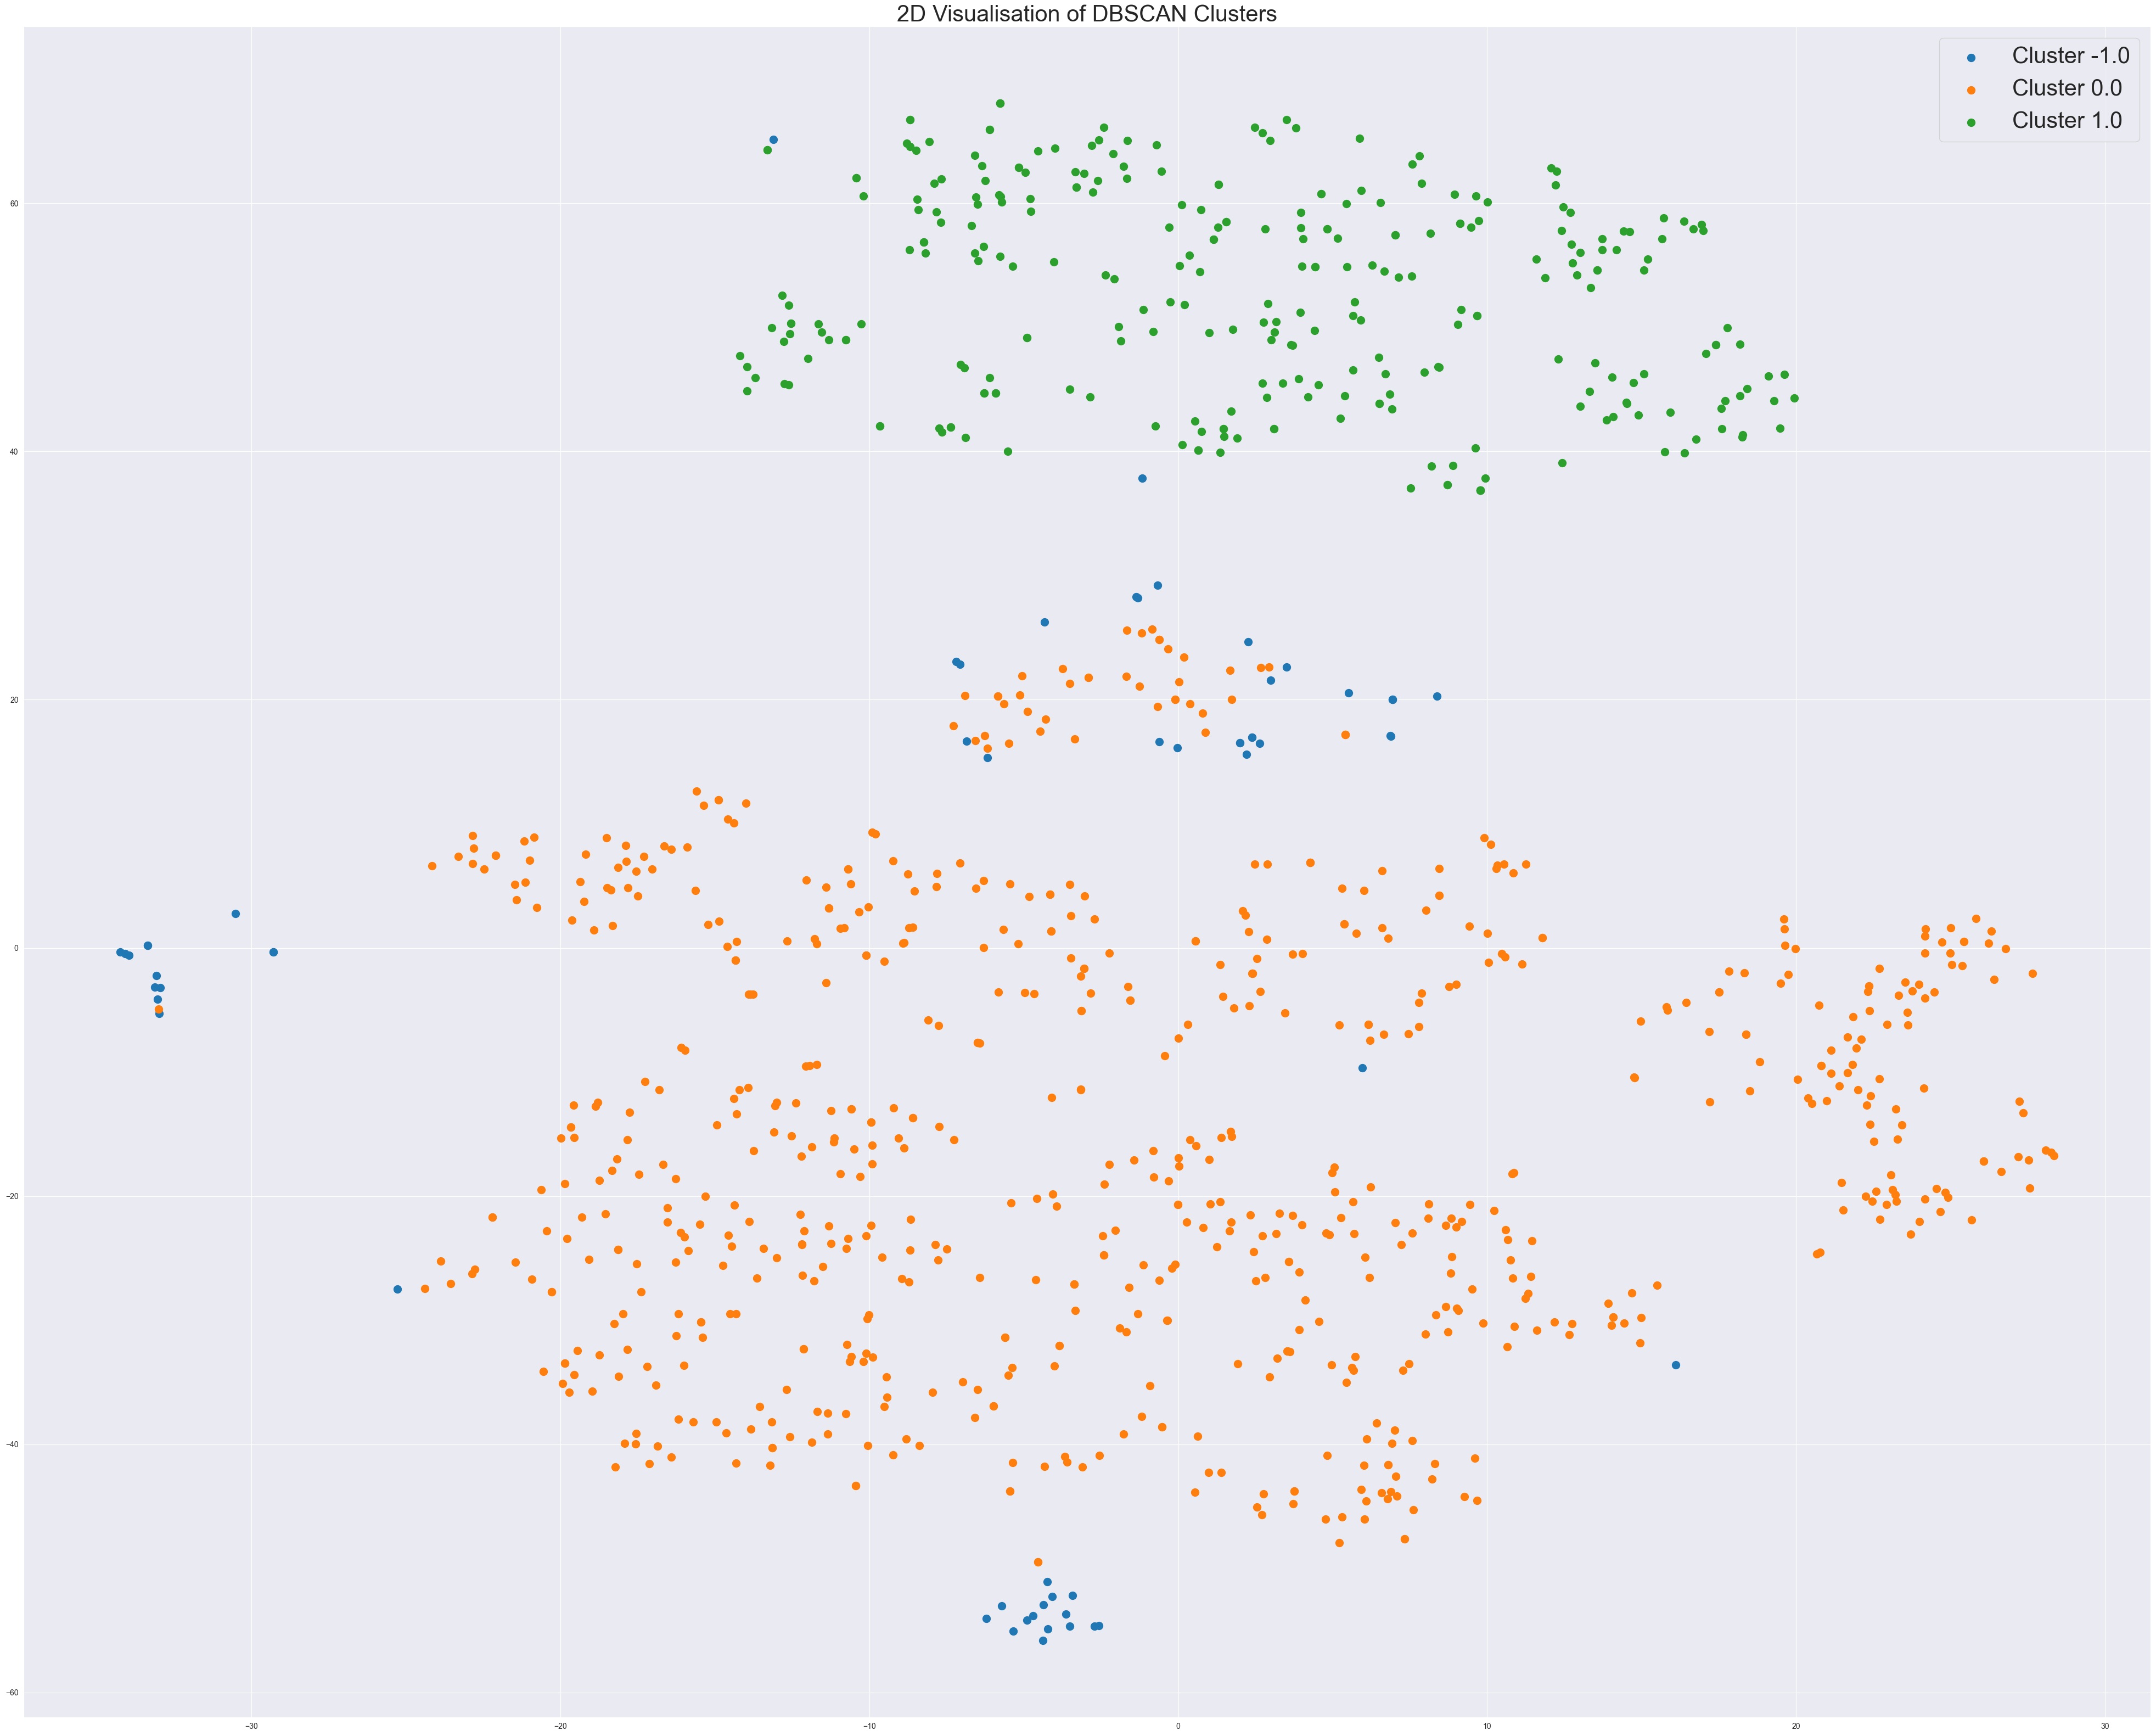

In [169]:
dbscan = MyDBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])

tsne = TSNE(n_components=2)
principal_components = tsne.fit_transform(df_normalized)

tsne_df = pd.DataFrame(data=principal_components, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters

plt.figure(figsize=(50, 40))
for cluster in sorted(tsne_df['cluster'].unique()): 
    cluster_data = tsne_df[tsne_df['cluster'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}', s = 100)

plt.title('2D Visualisation of DBSCAN Clusters', fontsize = 30)
plt.legend(fontsize = 30)
plt.grid(True)
plt.show()

In [171]:
print(f'Лучший результат силуэтного коэффициента моей модели: {my_model_best_score},'
      f' а вот лучший результат готовой модели {best_score} - Как мы видим результат один и тот же, все супер!')

Лучший результат силуэтного коэффициента моей модели: 0.14501858104938492, а вот лучший результат готовой модели 0.14501858104938492 - Как мы видим результат один и тот же, все супер!
